<h1>Designing Best Algorithm for Sea Suraface Elevation Estimates</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import math
%matplotlib widget

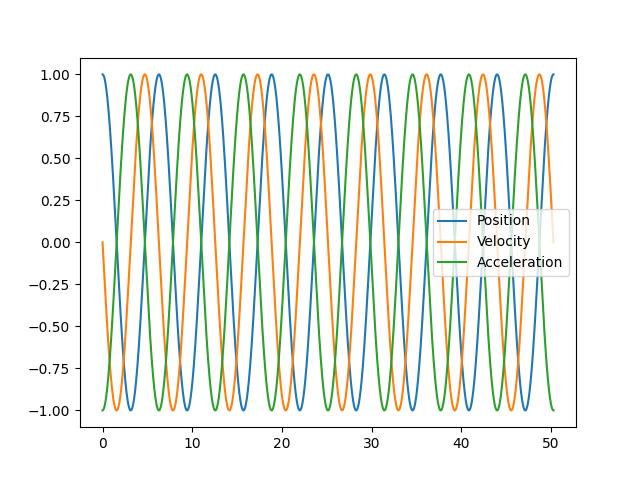

In [4]:
# Time Series of signals for Simulation
time = np.linspace(0, (16 * np.pi), num=10000)
dx = (16 * np.pi) / 10000
postion_z_true = np.cos(time)

# Compute the Velocity and acceleration signals from the true position
velocity_z_true = -np.sin(time)
accel_z_true = -np.cos(time)

# Plot the signals
fig_signal, ax = plt.subplots()
ax.plot(time, postion_z_true, label='Position')
ax.plot(time, velocity_z_true, label='Velocity')
ax.plot(time, accel_z_true, label='Acceleration')
ax.legend()



10000


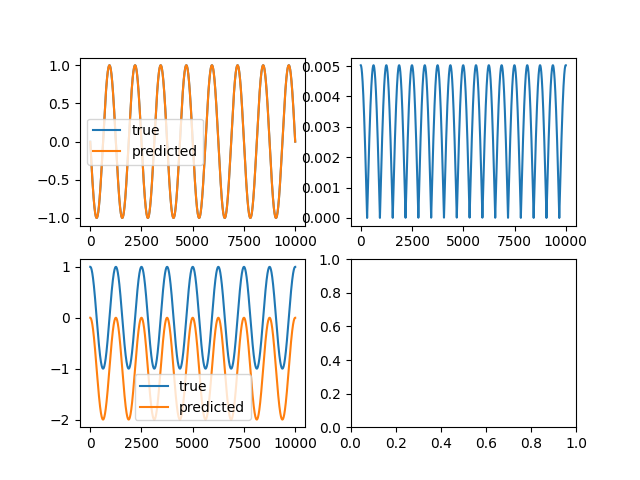

In [5]:
# Now Computing the position and velocty from the true acceleration signal 
print(len(accel_z_true))
# velocity_predicted = integrate.cumtrapz(accel_z_true, dx=dx)
# positions_predicted = integrate.cumtrapz(velocity_predicted, dx=dx)
velocity_predicted = integrate.cumulative_trapezoid(-np.cos(time), dx=dx)
positions_predicted = integrate.cumulative_trapezoid(-np.sin(time), dx=dx)

# Plot the true velocity signal and the integrated one
fig_predicted, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
ax1.plot(velocity_z_true, label='true')
ax1.plot(velocity_predicted, label='predicted')
ax1.legend()
ax2.plot(abs((velocity_predicted-velocity_z_true[:-1])))

# Plot Positions 
ax3.plot(postion_z_true, label='true')
ax3.plot(positions_predicted, label='predicted')
ax3.legend()
